```{index} bioinformatics
```
(16)=
# Chapter 16: Bioinformatics with Biopython & Nglview

Bioinformatics is the field of working with biological or biochemical data using computing resources, and while the underlying techniques for working with biological data is fundamentally the same as what has been seen so far, this field is large and significant enough to warrant its own chapter. More importantly, bioinformatics contains a multitude of specialized file formats making this a significant hurdle in working with these data. The good news is that biological/biochemical file formats are usually text files like seen in the previous chapters, and there are Python libraries available to facilitate the parsing and working with these file formats and data. This chapter focuses on a few common file formats, parsing them with both our own Python code and using the Biopython library to perform the heavy lifting.

The Biopython library is among the well-known bioinformatics Python libraries handy for working with biological and biochemical data. It will need to be installed in Jupyter or Google Colab because it is not a default library. As of this writing, Biopython can be installed [using pip](https://biopython.org/wiki/Download) by `pip install biopython`, and a Conda option is also available. Once installed, it is imported as `Bio`. This chapter assumes the following imports.

In [1]:
%config InlineBackend.figure_format = 'svg'

In [2]:
import Bio
from Bio import PDB, SeqIO, SeqUtils, Align

# Turns of warning (about data in PDB files)
import warnings
from Bio import BiopythonWarning
warnings.simplefilter('ignore', BiopythonWarning)

import matplotlib.pyplot as plt
import seaborn as sns
import os

```{index} sequences
```
(16.1)=
## 16.1 Working with Sequences

Among the most fundamental data in bioinformatics are sequences which simply provide the order of monomers in a sequence of nucleotides or amino acids. For protein sequences, these monomers are mainly the 20 common amino acids with other less frequent amino acids and other species possible, and for nucleic acid sequences, the monomers are nucleotides.  In this section, we will work with sequences inside Biopython to performing various operations such as sequence alignment and translating mRNA sequences into peptide sequences.

Inside Biopython, sequences are often stored as a Sequence object which looks like a string inside a list wrapped in `Seq()` such as below. This object contains many of the same methods as a Python string plus some extra, so you can still iterate through Sequence objects with a `for` loop along with index, slice, reverse them, and alter the case like a string.

~~~python
Seq('GCCGGCAGTCACACGCACAGGC')
~~~

```{index} file input/output; FASTA
```
(16.1.1)=
### 16.1.1 Reading FASTA Files with Biopython

There are numerous file formats that can store sequence data, but for the examples in this section, we will focus on the FASTA file format which only holds the sequence data and a small amount of metadata (i.e., data about the data). FASTA files are text files that look like the following when opened in a text editor. A FASTA file can contain a single or multiple sequence entries with the first line of each entry beginning with a `>`. The rest of this line includes helpful information about the sequence such as the organism and what specific molecule it relates to. The rest of the text block is sequence information. There is no strict rule on how many letters can be contained in each line, but 70 is a common length.

````{margin}
```{note}
While the FASTA lines may not look the same length as shown here, they will be the same width when opened in a monospaced font.
```
````

`>\>7AIZ_1|Chains A, D|Nitrogenase vanadium-iron protein alpha chain|Azotobacter vinelandii (354)
MPMVLLECDKDIPERQKHIYLKAPNEDTREFLPIANAATIPGTLSERGCAFCGAKLVIGGVLKDTIQMIH
MPMVLLECDKDIPERQKHIYLKAPNEDTREFLPIANAATIPGTLSERGCAFCGAKLVIGGVLKDTIQMIH
GPLGCAYDTWHTKRYPTDNGHFNMKYVWSTDMKESHVVFGGEKRLEKSMHEAFDEMPDIKRMIVYTTCPT
ALIGDDIKAVAKKVMKDRPDVDVFTVECPGFSGVSQSKGHHVLNIGWINEKVETMEKEITSEYTMNFIGD
FNIQGDTQLLQTYWDRLGIQVVAHFTGNGTYDDLRCMHQAQLNVVNCARSSGYIANELKKRYGIPRLDID
SWGFNYMAEGIRKICAFFGIEEKGEELIAEEYAKWKPKLDWYKERLQGKKMAIWTGGPRLWHWTKSVEDD
LGVQVVAMSSKFGHEEDFEKVIARGKEGTYYIDDGNELEFFEIIDLVKPDVIFTGPRVGELVKKLHIPYV
NGHGYHNGPYMGFEGFVNLARDMYNAVHNPLRHLAAVDIRDKSQTTPVIVRGAA`


In the following example, we will load a FASTA file containing Norway rat RNA using the `SeqIO.read()` and  `SeqIO.parse()` functions which are similar except that `SeqIO.read()` can only load FASTA files with a single entry while `SeqIO.parse()` can open files with single or multiple entries. Both will be demonstrated below, and both require two positional arguments - the file or file path as a string and the file type as a string.

~~~python
SeqIO.read('file_name', 'file_type')
SeqIO.parse('file_name', 'file_type')
~~~

In [3]:
rat = SeqIO.read('data/rcsb_pdb_430D.fasta', 'fasta')
rat

SeqRecord(seq=Seq('GGGUGCUCAGUACGAGAGGAACCGCACCC'), id='430D_1|Chain', name='430D_1|Chain', description='430D_1|Chain A|SARCIN/RICIN LOOP FROM RAT 28S R-RNA|Rattus norvegicus (10116)', dbxrefs=[])

The `SeqIO.read()` function returns a Sequence Recored object which has a few attributes shown in the table below. The most important attribute is the sequence itself which is stored as a Sequence object.

**Table 1** Sequence Record Attributes
| Attribute | Description |
|:--------:|----------------|
|`id` | Returns the sequence ID from the file's first line |
|`description` | Returns a description from the file's first line |
|`seq` | Returns the sequence as a Sequence object |
|`name` | Returns the sequence name from the file's first line (may be same as ID) |

In [4]:
rat.seq

Seq('GGGUGCUCAGUACGAGAGGAACCGCACCC')

In the event we have a file containing multiple entries, the  `SeqIO.parse()` function is required. The function works the same way as the `SeqIO.read()` version except that a one-time use iterator object is returned that contains each entry from the FASTA file. To extract this information, we need to iterate over it using a `for` loop. Data from each entry can be accessed using the same methods as the `SeqIO.read()` function. This is demonstrated below using a FASTA file for a protein structure of [Norwegian rat hemoglobin](https://www.rcsb.org/structure/3DHT).

In [5]:
fasta_data = SeqIO.parse('data/rcsb_pdb_3DHT.fasta', 'fasta')

seq_list = []
for entry in fasta_data:
    seq_list.append(entry.seq)

seq_list

[Seq('VLSADDKTNIKNCWGKIGGHGGEYGEEALQRMFAAFPTTKTYFSHIDVSPGSAQ...KYR'),
 Seq('VHLTDAEKAAVNGLWGKVNPDDVGGEALGRLLVVYPWTQRYFDSFGDLSSASAI...KYH')]

Because the iterator is a one-time use object, attempting to iterate over it again, like below, fails to return any data, so be sure to attach any data to a variable or append it to a list.

In [6]:
for entry in fasta_data:
    print(entry.seq)

(16.1.2)=
### 16.1.2 GC Content of Nucleotide Sequence

```{index} GC content
```

One piece of information we can extract from a nucleotide sequence is the GC content. In DNA for example, there are two complementary strands hydrogen bonded together which contain the base pairs adenosine(A)/thymine(T) and guanidine(G)/cytosine(C), so the number of adenosines equals the number of thymines and the number of guanines equals the number of cytosines. However, the number of A/T pairs does not necessarily equal the number of G/C pairs. The *GC content* of DNA is the fraction of total bases that are G/C which can be calculated using the number ($n$) of G and C bases divided by the total number of all bases in the sequence.

$$ GC \,\, content = \frac{GC\,\, bases}{sequence \,\,length} = \frac{n_G + n_C}{n_G + n_C + n_A + n_T}  $$

Below, we will calculate the GC content of a DNA sequence in a FASTA file using Biopython's `gc_fraction(seq)` function which accepts a Biopython sequence and returns the GC content in fraction form. 

In [7]:
DNA = SeqIO.parse('data/DNA_sequence_drago.fasta', 'fasta')
rat_seq = [x.seq for x in DNA]

SeqUtils.gc_fraction(*rat_seq)

0.5296912114014252

Sometimes there are characters in a DNA sequence other than A, T, C, and G due to ambiguities among other reasons. An N means that the base is unidentifiable while S means it is either C or G and W means it is either A or T. The `gc_fraction()` function provides an `ambiguous=` parameter that can be used to decide how to deal with ambiguous characters. Below are the three string options for the `ambiguous=` parameter where `remove` is the default setting.

**Table 2** Settings for `gc_fraction()` `ambiguous=` Parameter 
| Options | Description |
|:-------:|--------------|
|`'remove'`| Default setting; only uses 'ATCGSW' characters and ignores the rest |
|`'ignore'` | Uses 'GCS' characters for GC count and rest of characters for sequence length|
|`'weighted'`| Applies weights to various characters effectively forming a weighted average|

Our sequence contains some `N` characters, so if we set it to `ignore`, the GC content value is expected to decrease due to a larger denominator in the equation above versus the default `remove` option.

````{margin}
```{note}
The `rat_seq` is embedded in a list. To remove it from the list, it is "unpacked" using `*rat_seq`. Using `rat_seq[0]` would also accomplish the same thing.
```````

In [8]:
SeqUtils.gc_fraction(*rat_seq, ambiguous='ignore')

0.5247058823529411

(16.1.3)=
### 16.1.3 Nucleic Acids - Transcription, Translation, and Replication

In protein synthesis, the coding (or informational) strand of DNA is transcribed to mRNA which is then translated to a protein sequence. DNA can also replicate by unwinding and using additional complementary nucleotides to bond the coding and template strands. Biopython makes performing digital analogue of these operations relatively simple using the following functions.

**Table 3** Methods for Performing Transcription, Translation, and Replication
| Function | Description |
|:----------:|-----------------|
|`transcribe()` | Transcribes coding DNA strand to mRNA (maintains 5' $\rightarrow$ 3' direction)  |
|`translate()` | Translates mRNA sequence (5' $\rightarrow$ 3') to a peptide sequence (N $\rightarrow$ C) |
|`complement()` | Converts 5' $\rightarrow$ 3' nucleotide sequence to the 3' $\rightarrow$ 5' complementary sequence|
|`reverse_complement()` | Converts 5' $\rightarrow$ 3' DNA strand to 5' $\rightarrow$ 3' complementary sequence |
|`reverse_complement_rna()` | Converts 5' $\rightarrow$ 3' RNA strand to 5' $\rightarrow$ 3' complementary sequence|
|`complement_rna()` | Converts 5' $\rightarrow$ 3' RNA strand to 3' $\rightarrow$ 5' complementary sequence |
|`replace(old, new)` | Replaces `old` items in sequence with `new` (can also be used to replace spaces)|

While some functions in Biopython accept strings or Sequence objects, the functions above work exclusively with Sequence objects. The good news is that if you have a string, it is easy to convert to a Sequence object using the `Seq()` function like below.

In [9]:
coding_DNA = Bio.Seq.Seq('GGAGAGTGACGCCGGCAGTCACACGCACAGGCTGCAGCAACGAAAGAT')
coding_DNA

Seq('GGAGAGTGACGCCGGCAGTCACACGCACAGGCTGCAGCAACGAAAGAT')

We can perform transcription using the `transcribe()` method which operates on a DNA strand and assumes that the DNA strand is the coding (or informational) strand. It also assumes that the sequence is in the 5' $\rightarrow$ 3' direction and returns the mRNA sequence also in the 5' $\rightarrow$ 3' direction.

In [10]:
mRNA = coding_DNA.transcribe()
mRNA

Seq('GGAGAGUGACGCCGGCAGUCACACGCACAGGCUGCAGCAACGAAAGAU')

If you find yourself with the template strand, this can be converted to the coding strand using the `reverse_complement()` function like below which takes a DNA strand in the 5' $\rightarrow$ 3' direction and returns the complementary strand also in the 5' $\rightarrow$ 3' direction. This coding strand can then be transcribed to mRNA.

In [11]:
template_DNA = Bio.Seq.Seq('ATCTTTCGTTGCTGCAGCCTGTGCGTGTGACTGCCGGCGTCACTCTCC')
coding_DNA = template_DNA.reverse_complement()
coding_DNA.transcribe()

Seq('GGAGAGUGACGCCGGCAGUCACACGCACAGGCUGCAGCAACGAAAGAU')

Once we have our mRNA sequence, we can translate it to a peptide sequence using the `translate()` method which is performed using the standard codon table. 

````{margin}
```{note}
The asterisk in a peptide sequence represents a stop codon.
```
````

In [12]:
mRNA.translate()

Seq('GE*RRQSHAQAAATKD')

By default, this function will translate the entire mRNA sequence disregarding any stop codons. To heed the stop codons, set the `to_stop=` parameter to `True`.

In [13]:
mRNA.translate(to_stop=True)

Seq('GE')

```{index} sequence alignment
```
(16.1.4)=
### 16.1.4 Sequence Alignment

Biopython can perform both global and local pairwise alignments of sequences including nucleic acids and proteins. The difference between these types of alignments is that *global pairwise alignment* attempts to align the entirety of two sequences of at least somewhat similar length while *local pairwise alignment* attempts to align subsequences of the two sequences. Local alignment essentially attempts to find common regions between multiple sequences. The alignment processes generates a score based on user-defined rules and attempts to maximize this score to generate the "best" alignment. For example, aligned bases in two DNA sequences might be awarded a +1 while misaligned bases are penalized a -1.

Pairwise sequence alignment in Biopython starts with creating a PairwiseAligner object which requires the type of alignment (`'global'` or `'local'`). Optionally, you can set the scoring parameters which dictate how a match, mismatch, starting a gap, extending a gap, and ending a gap affect the score. By default, +1 is awarded for every match and mismatches and gaps are all 0. Below, the PairwiseAligner is set to `'global'` and scoring parameters are adjusted as shown.

In [14]:
aligner = Align.PairwiseAligner(mode='global',
                                match_score=1,
                                mismatch_score=-1,
                                open_gap_score=-1,
                                extend_gap_score=-0.5)

Once we have created the PairwiseAligner object, we can use the `align()` method to return the optimal alignment between the two sequences based on the scoring parameters. It is important to note that there can be multiple optimal sequence alignments (i.e., tied for best score) based on our scoring parameters, so the `align()` method can return multiple alignments. 

Below, the aligned sequences are stored in the variable `alignment`. When we check the length of this object, we find it contains 15 alignments which can be viewed by indexing or iteration.

In [15]:
seq1 = 'GGAGAGTGACGCCGGCAGTCACACGCACAGGCTGCAGCAACGAAAAGTT'
seq2 = 'GGAGAGTGACGCCGGGCAGTCACACGCTCAGGCTGCAGCAACGAAAAAGTTA'

alignments = aligner.align(seq1, seq2)
len(alignments)

15

In [16]:
print(alignments[0])

target            0 GGAGAGTGACGCC-GGCAGTCACACGCACAGGCTGCAGCAACG-AAAAGTT- 49
                  0 |||||||||||||-|||||||||||||.|||||||||||||||-|||||||- 52
query             0 GGAGAGTGACGCCGGGCAGTCACACGCTCAGGCTGCAGCAACGAAAAAGTTA 52



The score from the optimal alignments can be viewed using the `score` method. Keep in mind the score is affected by not only the quality of the alignment based on the alignment parameters but also sequence length, so it is not necessarily useful for comparing alignments between different pairs of sequences.

In [17]:
score = aligner.score(seq1, seq2)
score

44.0

(16.2)=
## 16.2 Structural Information

In this section, we will work with two common file formats for storing biochemical data: PDB and mmCIF. Both of these file formats are text files, so information can always be extracted using pure Python code you wrote yourself. However, there are also preexisting tools that can make this process substantially easier such as Biopython or scikit-bio (see [Further Reading](fr16)). Below you will see demonstrations of both pure Python and Biopython approaches with an emphasis on using Biopython.

Protein Database (PDB) and Macromolecular Crystallographic Information File (mmCIF) files are designed to hold protein sequence and structural information while the [FASTA file format](16.1.1) only holds sequence data for proteins and nucleic acids. The FASTA file format is simpler than the PDB and mmCIF file formats, but there is significant amounts of structural data, addressed below, contained in the latter formats that go beyond the sequence. 

```{index} file input/output; PDB
```
```{index} file input/output; mmCIF
```
(16.2.1)=
### 16.2.1 Reading PDB Files with Python

The PDB file format is a classic file format for holding protein sequence and structual information including the information listed below. While the PDB is being slowly replaced by the mmCIF (see [section 16.2.2](16.2.2)), the PDB file format is still quite common and worth looking at.

- Amino acid sequence of each strand
- Location and identity of non-amino acid species
- *xyz* coordinates of atoms in the crystal structure including trapped solvents
- Connectivity information
- Metadata about the protein (e.g., source organism, resolution, etc.)
- Secondary structural information 

First, we need a PDB file of a protein structure which can be downloaded for free from the [RCSB Protein Data Bank](https://www.rcsb.org/).  The **Download Files** menu on the top right provides a number of file format options including **PDB Format**. In the example below, we will look at the [Vanadium nitrogenase VFe protein structure](https://www.rcsb.org/structure/7AIZ) in the **7aiz.pdb** file.

The PDB file is organized where each line holds a different type of information, and a label in all caps on the far left of each line indicates what type of information is stored in that line. Below are some key labels (i.e., record type), but this is far from a comprehensive list. Data within a line is identifiable based on the character *position* in a line. This is in contrast to many other file types where data in a single line are distinguished by separators such as commas or spaces. For more information on the PDB file format, see the [Protein Data Bank website](https://www.wwpdb.org/documentation/file-format). If you are using JupyterLab, you can double click the PDB file to open it and view the contents.

**Table 4** Selected PDB File Record Types
| Record Type | Description          |
|:-----------:|-------------------------|
|HEADER       | Name of protein and date |
|TITLE        | Name of molecule      |
|COMPND       | Information about the compound |
|SOURCE       | Information about the source of the protein (e.g., source organism) |
|SEQRES       | Amino acid sequence and strand identity         |
|HET, HETNAM       | Information about non-amino acids in protein structure    |
|HELIX        | Information about helicies including type, start and end amino acids, etc.|
|SHEET        | Information about sheets including start and end amino acids and sense |
|ATOM         | Information about atoms in structure including *xyz* coordinates, identity, amino acid, etc.|
|SSBOND | Identifies cysteins involved in each disulfide bond |

Before we rely on Biopython to extract information from data files, we will use pure Python. As a short demonstration, the code below opens the PDB file and appends each line to a list called `data`. We can examine a few of the lines using slicing to see information about the structure of the protein. The lines shown below provide information about the helices and sheets in the protein structure.

In [18]:
file = 'data/7aiz.pdb'

data = []
with open(file, 'r') as f:
    for line in f:
        data.append(line)

In [19]:
data[1190:1200]

['HELIX  109 AM1 ARG F   24  THR F   44  1                                  21    \n',
 'HELIX  110 AM2 THR F   52  PHE F   73  1                                  22    \n',
 'HELIX  111 AM3 PRO F   74  GLN F   78  5                                   5    \n',
 'HELIX  112 AM4 ASN F   80  ILE F  100  1                                  21    \n',
 'SHEET    1 AA1 6 ILE A  19  LEU A  21  0                                        \n',
 'SHEET    2 AA1 6 TYR A 380  ASP A 383 -1  O  TYR A 381   N  TYR A  20           \n',
 'SHEET    3 AA1 6 GLN A 354  SER A 360  1  N  MET A 358   O  TYR A 380           \n',
 'SHEET    4 AA1 6 LYS A 330  THR A 335  1  N  MET A 331   O  GLN A 354           \n',
 'SHEET    5 AA1 6 VAL A 401  THR A 404  1  O  PHE A 403   N  ALA A 332           \n',
 'SHEET    6 AA1 6 TYR A 419  ASN A 421  1  O  VAL A 420   N  ILE A 402           \n']

As an exercise, we can extract information about the $\beta$-sheets in the protein. Specifically, we will look at the relative directions (sense) of adjacent strands which can run in the same direction (parallel) or in the opposite directions (antiparallel) as the previous strand. This is indicated by the integer in positions 39-40 of a SHEET line and can be either 0 for the first strand of a $\beta$-sheet, 1 for a strand parallel with the previous strand, and -1 for a strand antiparallel with the previous strand. The function below extracts this information by opening the PDB `file`, moving through each line of the file, and if the line begins with `SHEET`, it appends the relative direction to a list and returns the populated list.

In [20]:
def get_sheet_direction(file):
    '''Accepts a PDB files path (string) and returns a list
    of values indicating if a strand starts a beta sheet (0),
    strand is parallel to the previous strand (1), or is
    antiparallel to the previous strand (-1).
    
     >>> ('1abc.pdb') -> [0, 1, 1, 1, -1]
    '''
    
    structure_list = []
    
    with open(file, 'r') as f:
        for line in f:
            if line.startswith('SHEET'):
                sense = int(line[38:40].strip())
                structure_list.append(sense)
    
    return structure_list

In [21]:
sheet_sense = get_sheet_direction('data/7aiz.pdb')
print(sheet_sense)

[0, -1, 1, 1, 1, 1, 0, 1, 1, 1, -1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, -1, 1, 1, 1, 1, 0, 1, 1, 1, -1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1]


Text(0, 0.5, 'Count')

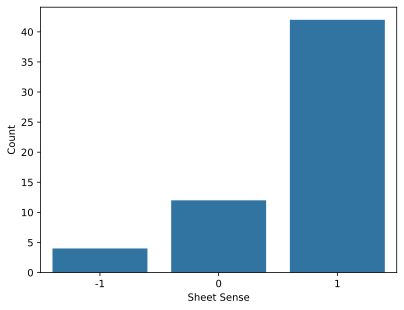

In [22]:
sns.countplot(x=sheet_sense, order=[-1, 0, 1])

plt.xlabel('Sheet Sense')
plt.ylabel('Count')

According to the graph above, parallel $\beta$-sheet strands are significantly more prevalent in this protein structure than antiparallel strands. This might be different for other proteins, so we will expand this analysis to a folder full of protein structures.

In [23]:
current_directory = os.getcwd()
data_folder = os.path.join(current_directory, 'data/proteins')

sheet_sense = []
for file in os.listdir('data/proteins'):
    if file.endswith('pdb'):
        sheet_sense.extend(get_sheet_direction(os.path.join(data_folder,file)))

Text(0, 0.5, 'Count')

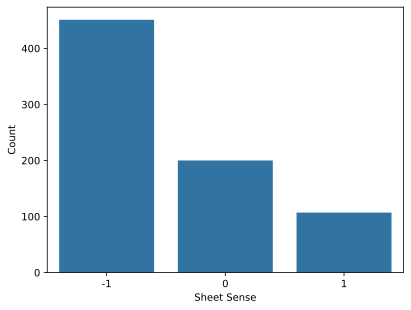

In [24]:
sns.countplot(x=sheet_sense, order=[-1, 0, 1])
plt.xlabel('Sheet Sense')
plt.ylabel('Count')

The trend over a larger sample of proteins is that antiparallel is significantly more common than parallel, so it seems that the 7aiz protein structure is an exception to the typical trend. However, this is only little over a dozen structures, so it would require a much larger dataset to be certain of this trend.

(16.2.2)=
### 16.2.2 Reading Structural Files with Biopython

Next, we will use the Biopython library to read data from PDB and other structural files. One of the appeals of using Biopython is that the user does not need to understand the strucutre of the file format; Biopython parses the files allowing you to focus on higher-level concerns. 

First, we need to import the `PDB` module of the Biopython library with the `import Bio.PDB` command if you have not done so already (see [start of this chapter](16)). Biopython, like SciPy, requires that individual modules be imported one at a time instead of the entire library (i.e., `import Bio` is not enough). You are welcome to import functions individually (e.g., `from Bio.PDB import PDBParser()`), but herein we will only import the module using `import Bio.PDB` so that the code more clearly shows the source of every function. The `PDB` module provides tools for dealing with the 3D structural data of macromolecules such as proteins and DNA. To parse a PDB file, we first create a parser object using the `Bio.PDB.PDBParser()` function.

In [25]:
parser = PDB.PDBParser()

We will then use the `get_structure()` function to read in data from a file. This function requires two positional arguments - a name for the structure and the name of the file. Both arguments are strings, and the structure name can be anything you like.

In [26]:
structure = parser.get_structure('7aiz', 'data/7aiz.pdb')

Despite the name, the `PDB` module contains tools for dealing with the other file formats such as mmCIF, PQR, and MMTF. The mmCIF file format is the successor to the PDB format making it an increasingly common file format. The good news is that parsing different structural files is almost identical as Biopython deals with most of the file format details behind the scenes. The only difference in dealing with mmCIF files versus PDB in Biopython is that we use the `PDB.MMCIFParser()` function to read the mmCIF file instead of `PDB.PDBParser()`, so mmCIF code would look like the following.

~~~python
parser = PDB.MMCIFParser()
structure = parser.get_structure('7aiz', 'data/7aiz.cif')
~~~

A list of various file parsers is provided in Table 5.

**Table 5** Selected File Parser Functions from `Bio.PDB`
| File Type | Parser Function |
|:---------:|-----------------|
|PDB | `PDB.PDBParser()` |
|mmCIF | `PDB.MMCIFParser()` |
|PQR | `PDB.PDBParser(is_pqr=True)` |
|MMTF | `Bio.PDB.mmtf.MMTFParser()` |

(16.2.3)=
### 16.2.3 Writing Files with Biopython

Biopython is also capable of writing structures to new PDB or mmCIF files, but by default it will not include much of the metadata (e.g., resolution, name of structure, authors, etc.) and information about secondary structures in the new files.

````{margin}
```{note}
Additional information can be included in the written file, but the process is a little involved. See the official [Biopython documentation](https://biopython.org/wiki/Documentation) for more information.
```
````

The general methodology is to first create a writing object using either `PDB.PBDIO()` or `PDB.MMCIFIO()` for creating a new PDB or mmCIF file, respectively. Next, use the `set_structure()` method on the writing object to load the data from an individual structure. Finally, write the file using the `save()` function and providing it with the name of the new file as a string.

In [27]:
# write a new PDB
io = PDB.PDBIO()
io.set_structure(structure[0])
io.save('new_protein.pdb')

In [28]:
# write a new mmCIF
io = PDB.MMCIFIO()
io.set_structure(structure[0])
io.save('new_protein.cif')

(16.2.4)=
### 16.2.4 Accessing Strands, Residues, and Atoms

The structural data extracted from the PDB or mmCIF by Biopython is organized in the hierarchal order of structure $\rightarrow$ model $\rightarrow$ chain $\rightarrow$ residue $\rightarrow$ atom. This means that models are contained within the structure, chains are contained within each model, residues are contained within each chain, and atoms are contained within each residue. The structure is the protein, the model is a particular 3D model of the protein, the chain is a single peptide chain in the protein, the residue is single amino acid residue in the chain, and the atom is each atom within a given amino acid residue (Table 6). 

**Table 6** Levels of Structure from PDB Data
| Level    |    Description      |
|:----------:|:---------------------|
|Structure   | Protein strucuture; may contain multiple models  |
|Model       | Particular 3D model of the protein (usually only one)  |
|Chain       | Pepetide chain |
|Residue     | Amino acid residue in a given chain |
|Atom        | Atoms in a particular amino acid residue |

````{margin}
```{note}
If the file contains a crystal structure, there is likely only one model, but if the structure came from NMR spectrscopy, there are often multiple structures.
```
````

While PDB files can contain multiple models of a protein, most only contain one. Even though there is only one model in our data, we will need to access the first (and only) model using indexing. For the first protein model, use `structure[0]`, and if there were a second, it would be `structure[1]`.

In [29]:
protein_model = structure[0]

Because of the hierarchical structure, each level of structure can be accessed by iterating through the level above it. For example, the following code will append all atoms in every residue in every chain in the protein model to a list called `atoms`.

In [30]:
atoms = []
for chain in protein_model:
    for residue in chain:
        for atom in residue:
            atoms.append(atom)

atoms[:10]

[<Atom N>,
 <Atom CA>,
 <Atom C>,
 <Atom O>,
 <Atom CB>,
 <Atom CG>,
 <Atom CD>,
 <Atom N>,
 <Atom CA>,
 <Atom C>]

This can add up to a large number of `for` loops in your code. Alternatively, you can get more direction access to the different levels of structure using the following methods that yield a generator.

````{margin}
```{note}
A *generator* function contains `yield` in place of `return` and only produces an item upon request (e.g., Python's `range()` function) to save memory.
```
````

**Table 7** Functions for Accessing Different Levels of Structure
| Function | Object | Description |
|:--------:|:--------------:|---------------|
|`get_chains()` | Model | Accesses peptide chains |
|`get_residues()` | Model, Chain | Accesses amino acid residues |
|`get_atoms()` | Model, Chain, Residue | Accesses individual atoms |
|`get_parent()` | Atom | Returns parent residue of atom |

For example, the following appends all residues in the protein model to a list and displays the first ten residues.

In [31]:
res_list = []
for residue in protein_model.get_residues():
    res_list.append(residue)

res_list[:10]

[<Residue PRO het=  resseq=2 icode= >,
 <Residue MET het=  resseq=3 icode= >,
 <Residue VAL het=  resseq=4 icode= >,
 <Residue LEU het=  resseq=5 icode= >,
 <Residue LEU het=  resseq=6 icode= >,
 <Residue GLU het=  resseq=7 icode= >,
 <Residue CYS het=  resseq=8 icode= >,
 <Residue ASP het=  resseq=9 icode= >,
 <Residue LYS het=  resseq=10 icode= >,
 <Residue ASP het=  resseq=11 icode= >]

Parts of the protein structure can also be accessed using keys (i.e., the ID's) of the various levels of structure. This does require more knowledge of the structure beforehand, though. To first get access to the ID's, you can iterate through a structure and use the `get_id()` method to see all of the substructure ID's. Alternatively, you can use the `get_unpacked_list()` function to get a list of all substructures of an object with ID's. For example, below we iterate through the protein model to get the strand ID's. The same can be done with iterating through strands to obtain the residue ID's or through residues to obtain the atom ID's. The strand and atom ID's will be letters (strings) while residue ID's are integers.

In [32]:
for strand in protein_model:
    print(strand.get_id())

A
B
C
D
E
F


In [33]:
strand_A = protein_model['A']
strand_A

<Chain id=A>

In [34]:
residue_10 = strand_A[10]
residue_10

<Residue LYS het=  resseq=10 icode= >

As a demonstration of both the `get_id()` and `get_unpacked_list()` approaches, below we can see the atoms present in a lysine residue.

````{margin}
```{note}
The `CA` is the $\alpha$-carbon in the peptide backbone while `C` is the carbonyl carbon. Additional carbons may be present depending upon the identity of the amino acid.
```
````

In [35]:
residue_10.get_unpacked_list()

[<Atom N>,
 <Atom CA>,
 <Atom C>,
 <Atom O>,
 <Atom CB>,
 <Atom CG>,
 <Atom CD>,
 <Atom CE>,
 <Atom NZ>]

In [36]:
for atom in residue_10:
    print(atom.get_id())

N
CA
C
O
CB
CG
CD
CE
NZ


In [37]:
residue_10['CA']

<Atom CA>

(16.2.5)=
### 16.2.5 Attributes of Atoms, Residues and Strands

Once we can access the atoms, residues, and strand, information can be extracted such as the identity, 3D coordinates, bond angles, and more. For example, below is a table of interesting atom attributes/functions.

**Table 8** Selected Atom Attributes/Functions
| Attribute/Function | Description                 |
| :--------: | -----------                 |
|`get_name()` |Returns the name of the atom as a string |
|`get_coord()` | Returns the *xyz* coordinates of the atom as an array |
|`get_vector()`    | Returns the *xyz* coordinates of the atom as a vector object |
|`transform()`    | Rotates or translates the atomic coordinates along the *xyz* axes |

The following code is used to obtain the 3D coordinates as arrays for all atoms in the protein model.

In [38]:
atom_coords = []
for atom in protein_model.get_atoms():
    atom_coords.append(atom.get_coord())

atom_coords[:5]

[array([ 89.966, -16.871,  91.86 ], dtype=float32),
 array([ 89.302, -16.084,  90.821], dtype=float32),
 array([ 89.475, -14.614,  91.157], dtype=float32),
 array([ 89.936, -14.284,  92.28 ], dtype=float32),
 array([ 87.831, -16.524,  90.863], dtype=float32)]

We can likewise access information about residues such as the following 

**Table 9** Selected Residue Attributes/Functions
| Attribute/Function | Description                 |
| :--------: | -----------                 |
|`get_resname()` |Returns the name of the residue as a three-letter code string |
|`get_segid()` | Returns the segment ID if available |
|`get_atoms()`    | Returns the atoms in the residue at a generator|
|`get_unpacked_list()`    | Returns atoms in the residue as a list |

In [39]:
res_list = []
for residue in protein_model.get_residues():
    res_list.append(residue.get_resname())
    
res_list[:5]

['PRO', 'MET', 'VAL', 'LEU', 'LEU']

There are a lot of interesting data obtainable from the strands, but getting access to these data is a little more involved. We need to first initiate (i.e., creating) a polypeptide builder object using using `PDB.PPBuilder()` and then build the Polyptetides object using the `build_peptides()` method. The `build_peptides()` function accepts the structure as the one required argument and by default only returns standard amine acids in the peptide chains unless the `aa_only=False` argument is included. The peptetide information in the example below is stored in the variable `peptides` which shows the six peptide chains in this particular protein structure along with sequence identifier integers that indicate the position of the amino acid along the peptide chain.

In [40]:
ppb = PDB.PPBuilder()
peptides = ppb.build_peptides(structure[0])

peptides

[<Polypeptide start=2 end=474>,
 <Polypeptide start=12 end=475>,
 <Polypeptide start=2 end=113>,
 <Polypeptide start=2 end=474>,
 <Polypeptide start=11 end=475>,
 <Polypeptide start=3 end=113>]

We can iterate through the PolyPeptide object  (`peptides`) to get the individual peptide chains. With the peptide chains, we can obtain information about the peptide chain, such as the names of amino acids, phi ($\phi$) and psi ($\psi$) angles, etc., using the various methods tabulated below.

**Table 10** Selected `strand` Attributes/Functions
| Attribute/Function | Description                 |
| :--------: | -----------                 |
|`get_sequence()` | Returns the squence of each strand using single-letter amino acid codes |
|`get_phi_psi_list()` | Returns a list of phi and psi dihedral angles in radians |
|`get_ca_list()`    | Returns list of alpha carbons |
|`get_theta_list()`    | Returns a list of theta angles in radians |
|`get_tau_list()` | Returns list of tau torsional angles in radians |

In the example below, we iterate through the peptide strands in `peptides` and print the theta angles in radians.

In [41]:
for strand in peptides:
    C_a = strand.get_theta_list()
    print(C_a[:5])

[np.float64(1.9516790193468274), np.float64(2.287601877880969), np.float64(1.7982004900815982), np.float64(2.0633166789273374), np.float64(1.5825173083130313)]
[np.float64(2.3268945513738237), np.float64(1.848500563201942), np.float64(2.2282952590602303), np.float64(2.005889321472149), np.float64(2.3504604293450675)]
[np.float64(1.511341690238054), np.float64(1.5829981072097719), np.float64(1.5844900414925847), np.float64(1.584810281608523), np.float64(1.5520394272913545)]
[np.float64(1.9673252796978447), np.float64(2.3178730899065365), np.float64(1.7942727121398567), np.float64(2.0482924789612516), np.float64(1.595800728474192)]
[np.float64(1.971514259887586), np.float64(2.2624600169176046), np.float64(1.7954830025275168), np.float64(2.2251480149170493), np.float64(2.014815418260001)]
[np.float64(2.216191919496574), np.float64(1.508875006315003), np.float64(1.5822328296905053), np.float64(1.5280194883863312), np.float64(1.6121663625568363)]


```{index} Ramachandran plots
```
(16.2.6)=
### 16.2.6 Ramachandran Plots

As an example application, we can generate a Ramachandran plot which visualizes the trends of the psi ($\psi$) versus phi ($\phi$) dihedral angles along peptide chains. While the omega ($\omega$) dihedral angles tend to be flat, the psi ($\psi$) versus phi ($\phi$) dihedral angles tend to exist in distinct ranges.

![peptide_angles](img/tripeptide.svg)

The general methodology below is:

1. Parse PDB files in the **data/proteins** folder using a PDB parser
2. Build a PolyPeptide object using a PDB builder
3. Iterate over the peptides and store the psi ($\psi$) and phi ($\phi$) dihedral angles 
4. Plot the results as psi ($\psi$) versus phi ($\phi$) 


In [42]:
phi, psi  = [], []

current_directory = os.getcwd()
data_folder = os.path.join(current_directory, 'data/proteins')

parser = PDB.PDBParser()
ppb = PDB.PPBuilder()

for file in os.listdir('data/proteins'):
    if file.endswith('pdb'):
        structure = parser.get_structure('file', os.path.join(data_folder,file))
        peptides = ppb.build_peptides(structure[0])
        for strand in peptides:
            phi.extend(x[0] for x in strand.get_phi_psi_list()[1:-1])
            psi.extend(x[1] for x in strand.get_phi_psi_list()[1:-1])

In [43]:
phi[:10]

[np.float64(-1.3150748393961473),
 np.float64(-2.7159390905663523),
 np.float64(-2.909570150157909),
 np.float64(-1.9350566725748244),
 np.float64(-2.3853630088972273),
 np.float64(1.3306807975618),
 np.float64(-1.6592559311514123),
 np.float64(-1.788129930665399),
 np.float64(-1.3609620204292667),
 np.float64(-1.014135279691033)]

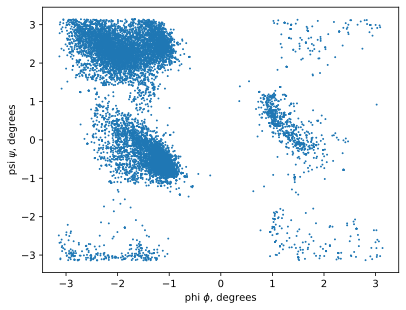

In [44]:
plt.scatter(phi, psi, s=1)
plt.xlabel('phi $\\phi$, degrees')
plt.ylabel('psi $\\psi$, degrees');

You may notice that the first and last dihedral angles were sliced off the list of phi and psi angles (last two lines of code). This is because there are no phi ($\phi$) values for first amino acid and no psi ($\psi$) values in the last amino acid of a strand. Dihedral angle measurements require four atoms, and the terminal amino acids are missing one of the required four atoms. For example, phi ($\phi$) dihedral angles are measured along the N-C$_\alpha$ bond of a C(O)-N-C$_\alpha$-C(O) chain of atoms, but the first amine acid only has N-C$_\alpha$-C(O).

The Ramachandran plot above is in radians which can be converted to degree (1 radian = 180/$\pi$) as is done below.

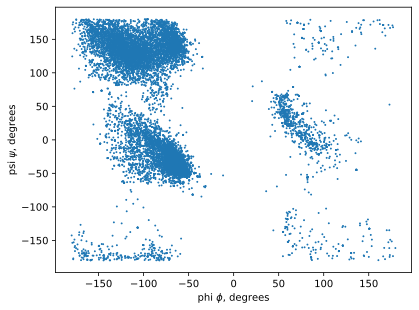

In [45]:
import math
psi_deg = [rad * (180 / math.pi) for rad in psi]
phi_deg = [rad * (180 / math.pi) for rad in phi]

plt.scatter(phi_deg, psi_deg, s=1)
plt.xlabel('phi $\\phi$, degrees')
plt.ylabel('psi $\\psi$, degrees');

Other representations of Ramachandran plots using different plotting types or color coding the markers based on secondary protein structure can be seen in the [Notebook 3 of the Visualization of Top8000 Protein Dataset](https://weisscharlesj.github.io/BiopythonRamachandran/VisTop8000_COMPLETE/03Ramachandran/03Ramachandran_Plot_v8.html) mini tutorial.

```{index} interactivity; rotate molecules
```
```{index} NGLView
```
(16.3)=
## 16.3 Visualization of Molecules

There are many pieces of software for viewing molecular structures directly from your desktop, but there are currently few for viewing structures within a Jupyter notebook. This section provides a brief introduction to nglview for interactively viewing molecular structures. Additional information on nglview can be found on the [nglview documentation page](https://nglviewer.org/ngl/api/manual/index.html).

```{tip}
Nglview often requires a restart after installation before working. As of this writing, I am having good luck with the most recent version, 3.1.2, working in JupyterLab for my students and me.
```

Nglview is not a standard library for Anaconda or Colab, so it needs to be installed, and as of this writing, nglview can be installed using either [pip](https://pypi.org/project/nglview/) or [conda](https://anaconda.org/conda-forge/nglview). Below, it will be imported with the `nv` alias. A restart may be required after installation.

In [46]:
import nglview as nv

(16.3.1)=
### 16.3.1 Loading Structures in Nglview

Molecular structures can be loaded using a number of different sources including directly from files, from RDKit Molecule objects, from Biopython structure objects, and from psi4 molecules among others. Below is table of some key functions for loading molecular structures.

**Table 11** A Selection of Nglview Functions for Loading Structural Data
| Function | Description |
|:--------:|--------------|
|`nv.show_file()` | Loads from a file (e.g., PDB or mmCIF) on your computer |
|`nv.show_pdbid()` | Fetches data from RCSB database when provided a PDB ID (e.g., '7aiz') |
|`nv.show_rdkit()` | Loads structure from a 3D RDKit Molecule object |
|`nv.show_biopython()` | Loads data from a Biopython structure object 

As our first example, we will load a file using the `show_file()` function which accepts a protein data file such as PDB. The structure is displayed in an interactive window where clicking and dragging rotates the molecule and scrolling zooms in and out. The size of this window can be expanded or contracted using the little gray arrow control(s) on the right corners of the display window.

```{note}
The following examples are no longer interactive. If you run this code in your own notebook, you will be able to interact with the structures.
```

~~~python
prot = nv.show_file('data/3hpb.pdb')
prot
~~~
![](img/nv_1.png)

In [47]:
prot = nv.show_file('data/3hpb.pdb')
prot

NGLWidget()

The next example accepts the four-letter ID for a protein crystal structure and fetches the data from an online database.

~~~python
prot = nv.show_pdbid('3hpb')
prot
~~~
![](img/nv_1.png)

In [48]:
prot = nv.show_pdbid('3hpb')
prot

NGLWidget()

We can also view a molecule loaded from a Biopython structure object (see [section 16.2.2](16.2.2)) using the `show_biopython()` function.

~~~python
structure = parser.get_structure('7aiz', 'data/7aiz.pdb')
prot_struct = nv.show_biopython(structure)
prot_struct
~~~
![](img/nv_2.png)

In [49]:
structure = parser.get_structure('7aiz', 'data/7aiz.pdb')
prot_struct = nv.show_biopython(structure)
prot_struct

NGLWidget()

RDKit Molecule objects can also be viewed in nglview using the `show_rdkit()` function, but first a 3D representation of the molecule needs to be generated using the `AllChem.EmbedMolecule(mol_object)` function. Many SMILES representations do not includes all of the hydrogens, so implicit hydrogens need to be added in using the `Chem.AddHs()` method. The visualization of glucose 6-phosphate from a SMILES representation is shown below.

~~~python
from rdkit import Chem
from rdkit.Chem import AllChem

mol = Chem.MolFromSmiles('O[C@H]1[C@H](O)[C@@H](COP(O)(O)=O)OC(O)[C@@H]1O')
mol = Chem.AddHs(mol) # add H's
AllChem.EmbedMolecule(mol) # generate 3D structure

G6P = nv.show_rdkit(mol)
G6P
~~~
![](img/nv_3.png)

In [50]:
from rdkit import Chem
from rdkit.Chem import AllChem

In [51]:
mol = Chem.MolFromSmiles('O[C@H]1[C@H](O)[C@@H](COP(O)(O)=O)OC(O)[C@@H]1O')
mol = Chem.AddHs(mol) # add H's
AllChem.EmbedMolecule(mol) # generate 3D structure

G6P = nv.show_rdkit(mol)
G6P

NGLWidget()

(16.3.2)=
### 16.3.2 Nglview Representations

The way molecules are represented by nglview can be modified using `add_representation(rep)` which takes a variety of string parameters indicating the representation. A few examples of representations are listed below with a more complete list provided on the [nglview documentation](https://nglviewer.org/ngl/api/manual/molecular-representations.html) page.

The default representation is `cartoon` which shows the peptide backbone as strands and ribbons (for secondary structures). It is important to clear the default representation using the `clear_representation()` method before adding a new representation. Otherwise, you will have both representations showing up on top of each other, unless this is what you want.

**Table 12** Selected Molecular Representations
| Representation | Description |
|:--------------:|-------------------|
|`cartoon` | Cartoon with strands and ribbons; sidechains not shown |
|`ball+stick`| Atomic spheres and stick bonds; sidechains shown |
|`licorice`| Balls and sticks where atoms and bonds have the same radii; sidechains shown |
|`rope` | Backbone is shown as a tube; sidechains not shown |
|`spacefill` | Spacefilling model with atoms showing atomic size; sidechains shown |
|`surface` | Shows the surface of the molecule; other [surface parameters](https://nglviewer.org/ngl/api/manual/molecular-representations.html) available |

````{margin}
```{note}
The `selection=protein` argument indicates to only show the protein and not surrounding waters and other non-peptides. See below for more about the `selection=` argument.
```````

~~~python
prot_3hpb = nv.show_file('data/3hpb.pdb')
prot_3hpb.clear_representations()
prot_3hpb.add_representation('ball+stick', selection='protein')
prot_3hpb
~~~
![](img/nv_4.png)

In [52]:
prot_3hpb = nv.show_file('data/3hpb.pdb')
prot_3hpb.clear_representations()
prot_3hpb.add_representation('ball+stick', selection='protein')
prot_3hpb

NGLWidget()

~~~python
prot_3hpb = nv.show_file('data/3hpb.pdb')
prot_3hpb.clear_representations()
prot_3hpb.add_representation('licorice', selection='protein')
prot_3hpb
~~~
![](img/nv_5.png)

In [53]:
prot_3hpb = nv.show_file('data/3hpb.pdb')
prot_3hpb.clear_representations()
prot_3hpb.add_representation('licorice', selection='protein')
prot_3hpb

NGLWidget()

Different sections of a protein can be represented differently using the `selection=` parameter in the `add_representation()` function. This includes using residue numbers from the structure file or using a variety of string arguments that select different types of structures. A short list of options is included below with a more complete list on the [nglview documentation](https://nglviewer.org/ngl/api/manual/selection-language.html) page.

**Table 13** Selected Options for the `selection=` Parameter
| Selection Option | Surace Surrounded Region(s) | 
|:------------------:|-------------------|
|`All` | Everything (default) |
|`protein` | Peptide chains |
|`dna` | DNA regions |
|`water` | Waters |
|`helix` | Helicies |
|`sheet` | Sheets |
|`hydrophobic` | Hydrophobic amino acids |
|`hydrophilic` | Hydrophilic amino acids |
|`acidic` | Acidic amino acids |
|`basic` | Basic amino acids |
|`polar` | Polar amino acids |
|`nonpolar`| Nonpolar amino acids |

As an example, we can show a protein structure with the backbone as the default cartoon and the side chains using a licorice structure as shown below.

~~~python
prot_1rpy = nv.show_file('data/3hpb.pdb')
prot_1rpy.add_representation('licorice', selection='sidechains')
prot_1rpy
~~~
![](img/nv_6.png)

In [54]:
prot_1rpy = nv.show_file('data/3hpb.pdb')
prot_1rpy.add_representation('licorice', selection='sidechains')
prot_1rpy

NGLWidget()

The colors can be customized using the `color=` parameter. This can accept either a color name as a string (e.g., `'blue'`) or color code the molecule based on other features such as hydrophobicity or chain.

**Table 14** Selected Options for the `color=` Parameter
| Option | Description | 
|:------------------:|-------------------|
|`chainid` | Each chain is colored differently |
|`chainname` | Each chain is colored differently |
|`element` | Uses standard element color coding (for licorice or ball+stick representations) |
|`hydrophobicity` | Sections colored by peptide hydrophobicity |
|`moleculetype` | Each molecule colored by type (e.g., peptide chain versus sulfate) |
|`residueindex` | Color changes gradually down the peptide chain |
|`resname` | Each peptide side chain is assigned a color |
|`sstruc` | Colors based on secondary structure |

Not all of the above options work for every representation, and some only work on the peptide side chains.

~~~python
prot_1rpy = nv.show_file('data/3hpb.pdb')
prot_1rpy.clear_representations()
prot_1rpy.add_representation('cartoon', color='hydrophobicity')
prot_1rpy
~~~
![](img/nv_7.png)

In [55]:
prot_1rpy = nv.show_file('data/3hpb.pdb')
prot_1rpy.clear_representations()
prot_1rpy.add_representation('cartoon', color='hydrophobicity')
prot_1rpy

NGLWidget()

~~~python
prot_1rpy = nv.show_file('data/3hpb.pdb')
prot_1rpy.add_representation('licorice', color='hydrophobicity')
prot_1rpy
~~~
![](img/nv_8.png)

In [56]:
prot_1rpy = nv.show_file('data/3hpb.pdb')
prot_1rpy.add_representation('licorice', color='hydrophobicity')
prot_1rpy

NGLWidget()

~~~python
prot_1rpy = nv.show_file('data/3hpb.pdb')
prot_1rpy.clear_representations()
prot_1rpy.add_representation('cartoon', color='sstruc')
prot_1rpy
~~~
![](img/nv_9.png)

In [57]:
prot_1rpy = nv.show_file('data/3hpb.pdb')
prot_1rpy.clear_representations()
prot_1rpy.add_representation('cartoon', color='sstruc')
prot_1rpy

NGLWidget()

~~~python
prot_1rpy = nv.show_file('data/3hpb.pdb')
prot_1rpy.add_representation('licorice', color='resname')
prot_1rpy
~~~
![](img/nv_10.png)

In [58]:
prot_1rpy = nv.show_file('data/3hpb.pdb')
prot_1rpy.add_representation('licorice', color='resname')
prot_1rpy

NGLWidget()

(16.3.3)=
### 16.3.3 Showing Surfaces

To view the molecule with a surface, use the `add_surface()` method which takes a number of optional parameters. Possibly the most important is `opacity=` which accepts a float from 0 $\rightarrow$ 1 indicating how opaque the surface is with 1 exhibiting no translucency and 0 being completely transparent. 

~~~python
full_surface = nv.show_biopython(structure)
full_surface.add_surface(opacity=0.3)
full_surface
~~~
![](img/nv_11.png)

In [59]:
full_surface = nv.show_biopython(structure)
full_surface.add_surface(opacity=0.3)
full_surface

NGLWidget()

Another useful parameter is the `selection=` parameter that operates like described in [section 16.3.2](16.3.2) where only the selected components have a surface around them. In the example below, only acidic amino acids are wrapped in a surface.

~~~python
acidic = nv.show_file('data/8pfy.cif')
acidic.clear_representations()
acidic.add_representation('licorice')
acidic.add_surface(selection='acidic',
                   opacity=0.4, 
                   color='pink')
acidic
~~~
![](img/nv_12.png)

In [60]:
acidic = nv.show_file('data/8pfy.cif')
acidic.clear_representations()
acidic.add_representation('licorice')
acidic.add_surface(selection='acidic',
                   opacity=0.4, 
                   color='pink')
acidic

NGLWidget()

We can also use `and` and `or` to produce more complex selections such as below where we only wrap backbones of residues that are acidic or basic and must only be in strand B.

~~~python
acidbase = nv.show_biopython(structure)
acidbase.clear_representations()
acidbase.add_representation('licorice')
acidbase.add_surface(selection=':B and backbone and (basic or acidic)',
                   opacity=0.3, 
                   color='lightblue')
acidbase
~~~
![](img/nv_13.png)

In [61]:
acidbase = nv.show_biopython(structure)
acidbase.clear_representations()
acidbase.add_representation('licorice')
acidbase.add_surface(selection=':B and backbone and (basic or acidic)',
                   opacity=0.3, 
                   color='lightblue')
acidbase

NGLWidget()

(16.3.4)=
### 16.3.4 Interactive GUI

Nglview also supports an interactive graphical user interface (GUI) within Jupyter notebooks. From the panel on the right, the user can add representations and change selections using the same selection keywords as above (see Table 12). From the **File** menu on the top left, new files can be opened or proteins can be fetched using the protein ID.

~~~python
prot = nv.show_pdbid('1rpy')
prot.clear_representations()
prot.add_representation('cartoon')
prot.add_representation('licorice', selection='ring')

prot.gui_style = 'ngl'
prot
~~~

![](img/interactive_gui.png)

(fr16)=
## Further Reading

1. PDB format documentation. https://www.wwpdb.org/documentation/file-format (free resource)

2. Introduction to PDB File Format. https://www.cgl.ucsf.edu/chimera/docs/UsersGuide/tutorials/pdbintro.html (free resource)

3. Biopython Website. https://biopython.org (free resource)

4. Nglview Manual. [https://nglviewer.org/ngl/api/manual/index.html](https://nglviewer.org/ngl/api/manual/index.html) (free resource)

5. Scikit-bio Website. http://scikit-bio.org (free resource). This is another related library with many similar features that may be of interest to Biopython users.
   
7. Biopython Publication. Cock, P. J. A.; Antao, T.; Chang, J. T.; Chapman, B. A.; Cox, C. J.; Dalke, A.; Friedberg, I.; Hamelryck, T.; Kauff, F.; Wilczynski, B.; De Hoon, M. J. L. Biopython: Freely Available Python Tools for Computational Molecular Biology and Bioinformatics. *Bioinformatics* **2009,** 25, 1422– 1423,

## Exercises

Complete the following exercises in a Jupyter notebook using the Biopython library or pure Python, unless otherwise noted. Any data file(s) referred to in the problems can be found in the [data](https://github.com/weisscharlesj/SciCompforChemists/tree/master/notebooks) folder in the same directory as this chapter's Jupyter notebook. Alternatively, you can download a zip file of the data for this chapter from [here](https://github.com/weisscharlesj/data_SciCompforChem) by selecting the appropriate chapter file and then clicking the **Download** button.

1. Using either pure Python or Biopython, generate a histogram plot that shows the frequency of peptide strand lengths in peptides in the **proteins** folder.
   
2. Generate a histogram plot showing the frequency of tau angle in peptide strands
   
3. Generate overlaying histrograms showing the frequency distribution of phi, psi, and omega dihedral bond angles.
   
4. Reading sequences from FASTA and do some analysis (Hamming distance + sequence alignment)
   
6. Read in PDB file and extract information (
   
8. Read numerous PDB files and extract information (average length of strands, average length of sheets???,
   
10. Load and visualize a protein (nglview?)